## Recipe 25

Ordered Ordinal Encoding

In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
# from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

from feature_engine.encoding import OrdinalEncoder

In [116]:
data = pd.read_csv('creditApprovalUCI.csv')

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [117]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [118]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Ordered integer encoding with pandas

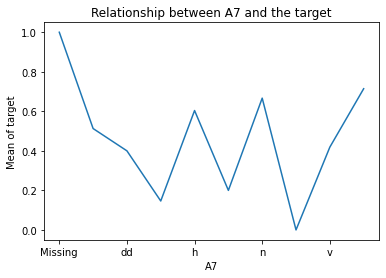

In [119]:
# target (A16) response per category of A7

X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [120]:
# let's order the labels in A7 according to the mean target value

X_train.groupby(['A7'])['A16'].mean().sort_values()

A7
o          0.000000
ff         0.146341
j          0.200000
dd         0.400000
v          0.418773
bb         0.512821
h          0.603960
n          0.666667
z          0.714286
Missing    1.000000
Name: A16, dtype: float64

In [121]:
# let's we generate an ordered list with the labels of A7

ordered_labels = X_train.groupby(['A7'])['A16'].mean().sort_values().index

ordered_labels

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')

In [122]:
# next let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'o': 0,
 'ff': 1,
 'j': 2,
 'dd': 3,
 'v': 4,
 'bb': 5,
 'h': 6,
 'n': 7,
 'z': 8,
 'Missing': 9}

In [123]:
# replace the labels with the ordered numbers

X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

In [124]:
# let's inspect the encoded variable
X_train['A7'].head()

596    4
303    4
204    4
351    1
118    4
Name: A7, dtype: int64

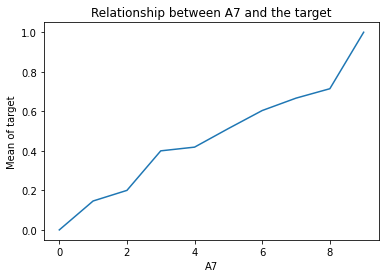

In [125]:
# let's explore the monotonic relationship

X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Ordered integer encoding with Feature-Engine

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [127]:
# let's create the encoder
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')

In [128]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [129]:
# the encoder stores the variables that it will encode

ordinal_enc.variables

In [130]:
# in the encoder dict we can observe the numbers that will
#replace each category in each variable

ordinal_enc.encoder_dict_

{'A1': {'b': 0, 'a': 1, 'Missing': 2},
 'A4': {'y': 0, 'u': 1, 'Missing': 2, 'l': 3},
 'A5': {'p': 0, 'g': 1, 'Missing': 2, 'gg': 3},
 'A6': {'ff': 0,
  'd': 1,
  'j': 2,
  'i': 3,
  'k': 4,
  'm': 5,
  'aa': 6,
  'c': 7,
  'w': 8,
  'e': 9,
  'q': 10,
  'cc': 11,
  'x': 12,
  'Missing': 13,
  'r': 14},
 'A7': {'o': 0,
  'ff': 1,
  'j': 2,
  'dd': 3,
  'v': 4,
  'bb': 5,
  'h': 6,
  'n': 7,
  'z': 8,
  'Missing': 9},
 'A9': {'f': 0, 't': 1},
 'A10': {'f': 0, 't': 1},
 'A12': {'t': 0, 'f': 1},
 'A13': {'s': 0, 'g': 1, 'p': 2}}

In [131]:
# let's transform train and test sets

X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

In [132]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,1,46.08,3.000,1,1,7,4,2.375,1,1,8,0,1,396.0,4159
303,1,15.92,2.875,1,1,10,4,0.085,0,0,0,1,1,120.0,0
204,0,36.33,2.125,0,0,8,4,0.085,1,1,1,1,1,50.0,1187
351,0,22.17,0.585,0,0,0,1,0.000,0,0,0,1,1,100.0,0
118,0,57.83,7.040,1,1,5,4,14.000,1,1,6,0,1,360.0,1332


In [133]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,1,45.83,10.50,1,1,10,4,5.000,1,1,7,0,1,0.0,0
586,0,64.08,20.00,1,1,12,6,17.500,1,1,9,0,1,0.0,1000
140,1,31.25,3.75,1,1,11,6,0.625,1,1,9,0,1,181.0,0
492,0,39.25,9.50,1,1,5,4,6.500,1,1,14,1,1,240.0,4607
350,1,26.17,2.00,1,1,2,2,0.000,0,0,0,0,1,276.0,1


## Recipe 26

Mean Categorical Encoder

In [134]:
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
# from feature_engine.categorical_encoders import MeanCategoricalEncoder
from feature_engine.encoding import MeanEncoder

In [135]:
data = pd.read_csv('creditApprovalUCI.csv')

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [136]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [137]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Target mean encoding with pandas

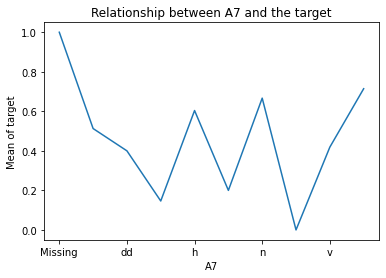

In [138]:
# show the  relationship between target groups and A7
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [139]:
# let's create a dictionary with the target mean per category
# for the variable A7

# group by the A7 categories - get the mean of the target values of those groups - convert  to dict

ordered_labels = X_train.groupby(['A7'])['A16'].mean().to_dict()

ordered_labels

{'Missing': 1.0,
 'bb': 0.5128205128205128,
 'dd': 0.4,
 'ff': 0.14634146341463414,
 'h': 0.6039603960396039,
 'j': 0.2,
 'n': 0.6666666666666666,
 'o': 0.0,
 'v': 0.4187725631768953,
 'z': 0.7142857142857143}

In [140]:
# replace the labels with the target mean

X_train['A7'] = X_train['A7'].map(ordered_labels)
X_test['A7'] = X_test['A7'].map(ordered_labels)

In [141]:
# let's inspect the result

X_train['A7'].head()

596    0.418773
303    0.418773
204    0.418773
351    0.146341
118    0.418773
Name: A7, dtype: float64

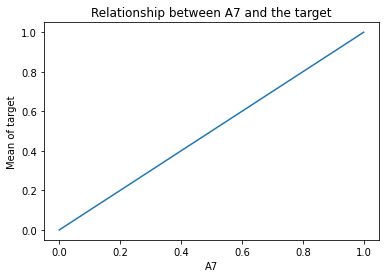

In [142]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Target mean encoding with Feature-Engine

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [144]:
# let's create the encoder

mean_enc = MeanEncoder(variables=vars_categorical)

In [145]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'])

In [146]:
# variables that will be encoded

mean_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [147]:
# in the encoder dict we can observe the target mean per category
# per variable

mean_enc.encoder_dict_

{'A1': {'Missing': 0.5, 'a': 0.4722222222222222, 'b': 0.4388059701492537},
 'A4': {'Missing': 1.0,
  'l': 1.0,
  'u': 0.512396694214876,
  'y': 0.22608695652173913},
 'A5': {'Missing': 1.0,
  'g': 0.512396694214876,
  'gg': 1.0,
  'p': 0.22608695652173913},
 'A6': {'Missing': 1.0,
  'aa': 0.4411764705882353,
  'c': 0.45161290322580644,
  'cc': 0.7,
  'd': 0.19047619047619047,
  'e': 0.6190476190476191,
  'ff': 0.10526315789473684,
  'i': 0.2682926829268293,
  'j': 0.25,
  'k': 0.2894736842105263,
  'm': 0.4230769230769231,
  'q': 0.625,
  'r': 1.0,
  'w': 0.5,
  'x': 0.7916666666666666},
 'A7': {'Missing': 1.0,
  'bb': 0.5128205128205128,
  'dd': 0.4,
  'ff': 0.14634146341463414,
  'h': 0.6039603960396039,
  'j': 0.2,
  'n': 0.6666666666666666,
  'o': 0.0,
  'v': 0.4187725631768953,
  'z': 0.7142857142857143},
 'A9': {'f': 0.07048458149779736, 't': 0.78515625},
 'A10': {'f': 0.25092250922509224, 't': 0.7028301886792453},
 'A12': {'f': 0.4524714828897338, 't': 0.44545454545454544},
 'A1

In [148]:
# let's transform train and test set

X_train_enc = mean_enc.transform(X_train)
X_test_enc = mean_enc.transform(X_test)

In [149]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.472222,46.08,3.000,0.512397,0.512397,0.451613,0.418773,2.375,0.785156,0.702830,8,0.445455,0.464853,396.0,4159
303,0.472222,15.92,2.875,0.512397,0.512397,0.625000,0.418773,0.085,0.070485,0.250923,0,0.452471,0.464853,120.0,0
204,0.438806,36.33,2.125,0.226087,0.226087,0.500000,0.418773,0.085,0.785156,0.702830,1,0.452471,0.464853,50.0,1187
351,0.438806,22.17,0.585,0.226087,0.226087,0.105263,0.146341,0.000,0.070485,0.250923,0,0.452471,0.464853,100.0,0
118,0.438806,57.83,7.040,0.512397,0.512397,0.423077,0.418773,14.000,0.785156,0.702830,6,0.445455,0.464853,360.0,1332


In [150]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0.472222,45.83,10.50,0.512397,0.512397,0.625000,0.418773,5.000,0.785156,0.702830,7,0.445455,0.464853,0.0,0
586,0.438806,64.08,20.00,0.512397,0.512397,0.791667,0.603960,17.500,0.785156,0.702830,9,0.445455,0.464853,0.0,1000
140,0.472222,31.25,3.75,0.512397,0.512397,0.700000,0.603960,0.625,0.785156,0.702830,9,0.445455,0.464853,181.0,0
492,0.438806,39.25,9.50,0.512397,0.512397,0.423077,0.418773,6.500,0.785156,0.702830,14,0.452471,0.464853,240.0,4607
350,0.472222,26.17,2.00,0.512397,0.512397,0.250000,0.200000,0.000,0.070485,0.250923,0,0.445455,0.464853,276.0,1


## Recipe 27
Encoding with the weight of evidence

In [151]:

# for encoding using feature-engine
from feature_engine.encoding import WoEEncoder, RareLabelEncoder

# from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [152]:
data = pd.read_csv('creditApprovalUCI.csv')

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [153]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [154]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Weight of Evidence with pandas

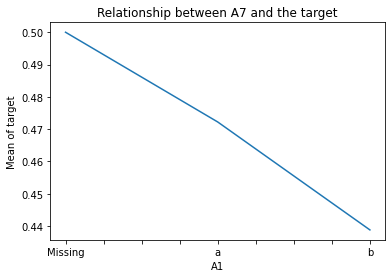

In [155]:
X_train.groupby(['A1'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [156]:
# Add inverse of the target to train set
X_train['A16_inv'] = 1 - X_train['A16']

In [157]:
# total numner of observations with target == 1
total_p1 = X_train['A16'].sum()

# total numner of observations with target == 0
total_p0 = X_train['A16_inv'].sum()

p1 = X_train.groupby(['A1'])['A16'].mean() / total_p1
p0 = X_train.groupby(['A1'])['A16_inv'].mean() / total_p0

woe = dict(np.log(p1 / p0))

In [158]:
woe

{'Missing': 0.20359895524123955,
 'a': 0.09237332013101507,
 'b': -0.04241042080997362}

In [159]:
# replace the labels with the woe

X_train['A1'] = X_train['A1'].map(woe)
X_test['A1'] = X_test['A1'].map(woe)

In [160]:
X_train['A1'].head()

596    0.092373
303    0.092373
204   -0.042410
351   -0.042410
118   -0.042410
Name: A1, dtype: float64

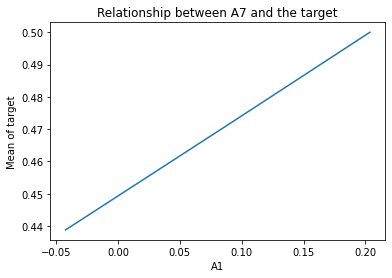

In [161]:
X_train.groupby(['A1'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Weight of Evidence with Feature-Engine

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [163]:
# create the weight of evidence encoder

woe_enc = WoEEncoder(variables=['A1', 'A10', 'A12'])

In [164]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train, y_train)

WoEEncoder(variables=['A1', 'A10', 'A12'])

In [165]:
# let's inspect the variables that will be encoded

woe_enc.variables

['A1', 'A10', 'A12']

In [166]:
# the encoder stores the woe values per category per variable

woe_enc.encoder_dict_

{'A1': {'Missing': 0.20359895524123955,
  'a': 0.09237332013101507,
  'b': -0.04241042080997339},
 'A10': {'f': -0.8900993186244411, 't': 1.064410534795166},
 'A12': {'f': 0.012909148776768313, 't': -0.015454610821445114}}

In [167]:
# let's transform train and test sets

X_train_enc = woe_enc.transform(X_train)
X_test_enc = woe_enc.transform(X_test)

In [168]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.092373,46.08,3.000,u,g,c,v,2.375,t,1.064411,8,-0.015455,g,396.0,4159
303,0.092373,15.92,2.875,u,g,q,v,0.085,f,-0.890099,0,0.012909,g,120.0,0
204,-0.042410,36.33,2.125,y,p,w,v,0.085,t,1.064411,1,0.012909,g,50.0,1187
351,-0.042410,22.17,0.585,y,p,ff,ff,0.000,f,-0.890099,0,0.012909,g,100.0,0
118,-0.042410,57.83,7.040,u,g,m,v,14.000,t,1.064411,6,-0.015455,g,360.0,1332


In [169]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0.092373,45.83,10.50,u,g,q,v,5.000,t,1.064411,7,-0.015455,g,0.0,0
586,-0.042410,64.08,20.00,u,g,x,h,17.500,t,1.064411,9,-0.015455,g,0.0,1000
140,0.092373,31.25,3.75,u,g,cc,h,0.625,t,1.064411,9,-0.015455,g,181.0,0
492,-0.042410,39.25,9.50,u,g,m,v,6.500,t,1.064411,14,0.012909,g,240.0,4607
350,0.092373,26.17,2.00,u,g,j,j,0.000,f,-0.890099,0,-0.015455,g,276.0,1


## Recipe 28 - grouping rare categories 

In [170]:
from feature_engine.encoding import WoEEncoder, RareLabelEncoder

In [171]:
data = pd.read_csv('creditApprovalUCI.csv')

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [172]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [173]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

## Count encoding with pandas

In [174]:
# let's inspect the frequency of labels in A7

X_train['A7'].value_counts() / len(X_train)

v          0.573499
h          0.209110
ff         0.084886
bb         0.080745
z          0.014493
dd         0.010352
j          0.010352
Missing    0.008282
n          0.006211
o          0.002070
Name: A7, dtype: float64

In [177]:
# rare vs non rare -tolerance level passed  in as parm

def find_frequent_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts()  / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [178]:
# frequent categories in A7

frequent_cat = find_frequent_labels(X_train, 'A7', 0.05) # Note tolerance level

frequent_cat

['v', 'h', 'ff', 'bb']

In [179]:
# rare categories in A7

[x for x in X_train['A7'].unique() if x not in frequent_cat]

['dd', 'z', 'j', 'Missing', 'n', 'o']

In [180]:
# let's group rare labels into a new category called rare

X_train['A7'] = np.where(X_train['A7'].isin(frequent_cat), X_train['A7'], 'Rare')
    
X_test['A7'] = np.where(X_test['A7'].isin(frequent_cat), X_test['A7'], 'Rare')

In [181]:
# let's inspect the results

X_train['A7'].value_counts() / len(X_train)

v       0.573499
h       0.209110
ff      0.084886
bb      0.080745
Rare    0.051760
Name: A7, dtype: float64

## One hot encoding with Feature-Engine

In [ ]:
# let's separate into train and test sets (again)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [186]:
# Rare category encoder

rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4, variables=vars_categorical)  


In [187]:
# let's fit the encoder to the train set

rare_encoder.fit(X_train)

c:\Python310\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable A1 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Python310\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable A4 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Python310\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable A5 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Python310\lib\site-packages\feature_engine\encoding\rare_label.py:178: UserWarning: The number of unique categories for variable A9 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Python310\lib

RareLabelEncoder(n_categories=4,
                 variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12',
                            'A13'])

In [188]:
rare_encoder.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [189]:
# in the encoder dict we can observe the number of 
# observations per category for each variable

rare_encoder.encoder_dict_

{'A1': array(['a', 'b', 'Missing'], dtype=object),
 'A4': array(['u', 'y', 'Missing', 'l'], dtype=object),
 'A5': array(['g', 'p', 'Missing', 'gg'], dtype=object),
 'A6': Index(['c', 'q', 'w', 'i', 'ff', 'k', 'aa', 'cc', 'm'], dtype='object'),
 'A7': Index(['v', 'h', 'ff', 'bb', 'Rare'], dtype='object'),
 'A9': array(['t', 'f'], dtype=object),
 'A10': array(['t', 'f'], dtype=object),
 'A12': array(['t', 'f'], dtype=object),
 'A13': array(['g', 's', 'p'], dtype=object)}

In [190]:
# let's transform the train and test sets

X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)

In [191]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332


In [192]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,a,45.83,10.50,u,g,q,v,5.000,t,t,7,t,g,0.0,0
586,b,64.08,20.00,u,g,Rare,h,17.500,t,t,9,t,g,0.0,1000
140,a,31.25,3.75,u,g,cc,h,0.625,t,t,9,t,g,181.0,0
492,b,39.25,9.50,u,g,m,v,6.500,t,t,14,f,g,240.0,4607
350,a,26.17,2.00,u,g,Rare,Rare,0.000,f,f,0,t,g,276.0,1


## Recipe 29 - performing binary encoding

In [193]:
# for encoding using feature-engine
from category_encoders import BinaryEncoder

In [194]:
data = pd.read_csv('creditApprovalUCI.csv')

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [195]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

In [196]:
X_train['A7'].unique()

array(['v', 'ff', 'h', 'dd', 'z', 'bb', 'j', 'Missing', 'n', 'o'],
      dtype=object)

In [197]:
# create the binary encoder

encoder = BinaryEncoder(cols=['A7'], drop_invariant=True)

In [198]:
# let's fit the transformer to the train set

encoder.fit(X_train)

BinaryEncoder(cols=['A7'], drop_invariant=True,
              mapping=[{'col': 'A7',
                        'mapping':      A7_0  A7_1  A7_2  A7_3
 1      0     0     0     1
 2      0     0     1     0
 3      0     0     1     1
 4      0     1     0     0
 5      0     1     0     1
 6      0     1     1     0
 7      0     1     1     1
 8      1     0     0     0
 9      1     0     0     1
 10     1     0     1     0
-1      0     0     0     0
-2      0     0     0     0}])

In [200]:
# let's inspect the information stored in the transformer

encoder.feature_names

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7_0',
 'A7_1',
 'A7_2',
 'A7_3',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16']

In [201]:
# let's fit the transformer to the train set

encoder.fit(X_train)

BinaryEncoder(cols=['A7'], drop_invariant=True,
              mapping=[{'col': 'A7',
                        'mapping':      A7_0  A7_1  A7_2  A7_3
 1      0     0     0     1
 2      0     0     1     0
 3      0     0     1     1
 4      0     1     0     0
 5      0     1     0     1
 6      0     1     1     0
 7      0     1     1     1
 8      1     0     0     0
 9      1     0     0     1
 10     1     0     1     0
-1      0     0     0     0
-2      0     0     0     0}])

In [205]:
# let's transform train and test sets

X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [206]:
print(X_train_enc.head())

    A1     A2     A3 A4 A5  A6  A7_0  A7_1  A7_2  A7_3      A8 A9 A10  A11  \
596  a  46.08  3.000  u  g   c     0     0     0     1   2.375  t   t    8   
303  a  15.92  2.875  u  g   q     0     0     0     1   0.085  f   f    0   
204  b  36.33  2.125  y  p   w     0     0     0     1   0.085  t   t    1   
351  b  22.17  0.585  y  p  ff     0     0     1     0   0.000  f   f    0   
118  b  57.83  7.040  u  g   m     0     0     0     1  14.000  t   t    6   

    A12 A13    A14   A15  A16  
596   t   g  396.0  4159    1  
303   f   g  120.0     0    0  
204   f   g   50.0  1187    1  
351   f   g  100.0     0    0  
118   t   g  360.0  1332    1  


In [207]:
X_train.shape, X_train_enc.shape, X_train['A7'].nunique()

((483, 16), (483, 19), 10)

In [208]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7_0,A7_1,A7_2,A7_3,A8,A9,A10,A11,A12,A13,A14,A15,A16
14,a,45.83,10.50,u,g,q,0,0,0,1,5.000,t,t,7,t,g,0.0,0,1
586,b,64.08,20.00,u,g,x,0,0,1,1,17.500,t,t,9,t,g,0.0,1000,1
140,a,31.25,3.75,u,g,cc,0,0,1,1,0.625,t,t,9,t,g,181.0,0,1
492,b,39.25,9.50,u,g,m,0,0,0,1,6.500,t,t,14,f,g,240.0,4607,1
350,a,26.17,2.00,u,g,j,0,1,1,1,0.000,f,f,0,t,g,276.0,1,0


## Recipe -extra  - Decision tree encoding

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.encoding import DecisionTreeEncoder


In [210]:
# Load dataset
def load_titanic():
        data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
        data = data.replace('?', np.nan)
        data['cabin'] = data['cabin'].astype(str).str[0]
        data['pclass'] = data['pclass'].astype('O')
        data['embarked'].fillna('C', inplace=True)
        return data


In [212]:
data = load_titanic()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [213]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                data.drop(['survived', 'name', 'ticket'], axis=1),
                data['survived'], test_size=0.3, random_state=0)


In [214]:
X_train[['cabin', 'pclass', 'embarked']].head(10)

,cabin,pclass,embarked
501,n,2,S
588,n,2,S
402,n,2,C
1193,n,3,Q
686,n,3,Q
971,n,3,Q
117,E,1,C
540,n,2,S
294,C,1,C
261,E,1,S


In [219]:
# set up the encoder
encoder = DecisionTreeEncoder(variables=['cabin', 'pclass', 'embarked'], regression=False,random_state=0)


In [220]:
# fit the encoder
encoder.fit(X_train, y_train)

DecisionTreeEncoder(random_state=0, regression=False,
                    variables=['cabin', 'pclass', 'embarked'])

In [221]:
# transform the data
train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

In [222]:
train_t[['cabin', 'pclass', 'embarked']].head(10)

,cabin,pclass,embarked
501,0.304843,0.307580,0.338957
588,0.304843,0.307580,0.338957
402,0.304843,0.307580,0.558011
1193,0.304843,0.307580,0.373494
686,0.304843,0.307580,0.373494
971,0.304843,0.307580,0.373494
117,0.649533,0.617391,0.558011
540,0.304843,0.307580,0.338957
294,0.649533,0.617391,0.558011
261,0.649533,0.617391,0.338957
